# Physician and Other Supplier Data
The Physician and Other Supplier Public Use File (Physician and Other Supplier PUF) provides information on services and procedures provided to Medicare beneficiaries by physicians and other healthcare professionals. The Physician and Other Supplier PUF contains information on utilization, payment (allowed amount and Medicare payment), and submitted charges organized by National Provider Identifier (NPI), Healthcare Common Procedure Coding System (HCPCS) code, and place of service. This PUF is based on information from CMS’s National Claims History Standard Analytic Files. The data in the Physician and Other Supplier PUF covers calendar year 2012 and contains 100% final-action physician/supplier Part B non-institutional line items for the Medicare fee-for-service population.

While the Physician and Other Supplier PUF has a wealth of information on payment and utilization for Medicare Part B services, the dataset has a number of limitations. Of particular importance is the fact that the data may not be representative of a physician’s entire practice as it only includes information on Medicare fee-for-service beneficiaries. In addition, the data are not intended to indicate the quality of care provided and are not risk-adjusted to account for differences in underlying severity of disease of patient populations. For additional limitations, please review the methodology document available below.

Description source:https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/Medicare-Provider-Charge-Data/Physician-and-Other-Supplier2016.html

Data source:https://data.cms.gov/browse?q=Medicare%20Provider%20Utilization&sortBy=relevance

In [1]:
cd

C:\Users\jerem\Documents\Stata Class\code


## Importing

You can input the url of the dataset and import directly.

In [ ]:
*import delimited "https://data.cms.gov/api/views/sk9b-znav/rows.csv?accessType=DOWNLOAD"

But I already have the dataset, so we will import from the local file.

In [2]:
local filepath "C:\Users\jerem\Box Sync\Geriatrics\KO\input_data\Medicare_PUF"
import delimited "`filepath'\Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2015.csv"



(26 vars, 9,497,892 obs)


`local` is a `macro` Stata command that allows you to store strings to local macro names. "A macro has a macro name and macro contents. Everywhere a punctuated macro name appears in a command— punctuation is defined below—the macro contents are substituted for the macro name."

Source: https://www.stata.com/manuals13/pmacro.pdf

We `set seed` so that we can reproduce this random sample again. 3535 is just a number I picked.

In [3]:
set seed 3535

This file is large. But since this is an exercise, we will take a small sample to work with. 

`sample` is a Stata command that allows you to randomly keep a certain percentage of the data. So `sample 10`, samples 10% of the data. 

In [4]:
sample 10

(8,548,103 observations deleted)


In [5]:
describe


Contains data
  obs:       949,789                          
 vars:            26                          
 size:   578,421,501                          
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
              storage   display    value
variable name   type    format     label      variable label
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
nationalprovi~r long    %12.0g                National Provider Identifier
lastnameorgan~o str70   %70s                  Last Name/Organization Name of the Provider
firstnameofth~r str20   %20s                  First Name of the Provider
middleinitial~r str1    %9s                   Middle Initial of the Provider
credentialsof~r str20  

## Motivation

Question 1: How many physicians/organizations are there in each Stata in the random sample?<br>
Question 2: How much did each of the physicians/organizations in the random sample make?<br>
Question 3: Which providers provided Home Based Medical Care?

### Question 1

Is the data unique by providers?

In [7]:
codebook nationalprovideridentifier


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
nationalprovideridentifier                                                                                                                                                   National Provider Identifier
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (long)

                 range:  [1.003e+09,1.993e+09]        units:  1
         unique values:  475,439                  missing .:  0/949,789

                  mean:   1.5e+09
              std. dev:   2.9e+08

           percentiles:        10%       25%       50%       75%       90%
                           1.1e+09   1.2e+09   1.5e+09   1.7e+09   1.9

There are 475,439 providers/physicians in the random sample.

### Question 2

In [6]:
sum averagemedicarepaymentamount, detail


               Average Medicare Payment Amount
-------------------------------------------------------------
      Percentiles      Smallest
 1%     .6027273              0
 5%     3.518688              0
10%     6.949286       .0006613       Obs             949,789
25%     18.46324       .0028188       Sum of Wgt.     949,789

50%     45.83917                      Mean           76.92642
                        Largest       Std. Dev.      195.5731
75%     85.54122       20864.97
90%     154.0762       23352.66       Variance       38248.86
95%     198.7759       28177.47       Skewness       40.83472
99%     648.9693       28266.43       Kurtosis       3300.137


We can see that there are 475,439 unique values in nationalprovideridentifier. But there are 949,789 observations. So we can say that the data is not unique by providers. Therefore, in order find out how much does each provider in the sample makes, we will need to collapse the data by providers.

In [8]:
gen totalmedicarepaymentamount = numberofmedicarebeneficiaries*averagemedicarepaymentamount

In [16]:
preserve

In [17]:
collapse (sum)totalmedicarepaymentamount (first) firstnameoftheprovider lastnameorganizationnameofthepro, by(nationalprovideridentifier)
sum totalmedicarepaymentamount, 
list nationalprovideridentifier firstnameoftheprovider lastnameorganizationnameofthepro if totalmedicarepaymentamount == r(max)




    Variable |        Obs        Mean    Std. Dev.       Min        Max
-------------+---------------------------------------------------------
totalmedic~t |    475,439    10389.15    99054.22          0   4.70e+07


        +-----------------------------------------------------+
        | national~r   firstn~r   lastnameorganizationnameo~o |
        |-----------------------------------------------------|
192981. | 1407855240              ROCKY MOUNTAIN HOLDINGS LLC |
        +-----------------------------------------------------+


Rocky Mountain Holdings LLC made the most in this random sample.

(bin=56, start=0, width=839759.37)


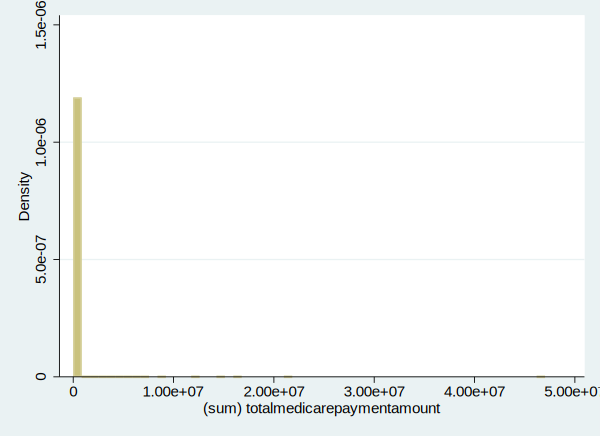

In [18]:
histogram totalmedicarepaymentamount

In [23]:
sum totalmedicarepaymentamount, detail


              (sum) totalmedicarepaymentamount
-------------------------------------------------------------
      Percentiles      Smallest
 1%        55.86              0
 5%       247.43       .0072745
10%       468.12       .0478853       Obs             475,439
25%     1226.516            .11       Sum of Wgt.     475,439

50%     3457.588                      Mean           10389.15
                        Largest       Std. Dev.      99054.22
75%     9697.688       1.46e+07
90%     22315.24       1.62e+07       Variance       9.81e+09
95%     35582.24       2.18e+07       Skewness         281.06
99%     87061.88       4.70e+07       Kurtosis       115756.7


In [19]:
gen ltotalmedicarepaymentamount = log(totalmedicarepaymentamount)

(1 missing value generated)


In [20]:
label variable ltotalmedicarepaymentamount "log of totalmedicarepaymentamount"

(bin=56, start=-4.9233861, width=.40338585)


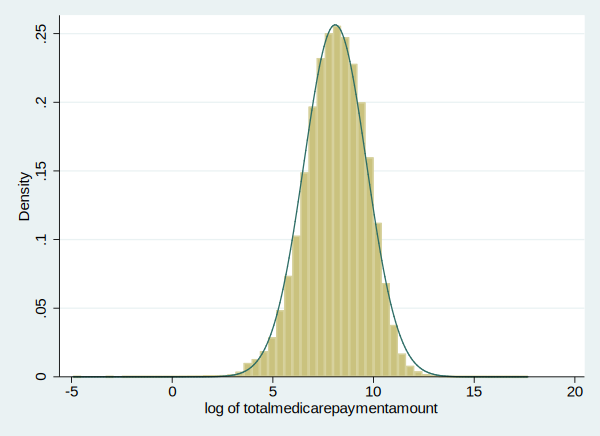

In [22]:
histogram ltotalmedicarepaymentamount, normal

In [24]:
restore

### Question 3

We have to find the HCPCS codes that correspond to Home base medical care services in order to identify them. HCPCS stands for  Healthcare Common Procedure Coding System.

They are used for billing Medicare & Medicaid patients — The Healthcare Common Prodecure Coding System (HCPCS) is a collection of codes that represent procedures, supplies,	products and services which may be provided to Medicare beneficiaries and to individuals enrolled in private health insurance programs. HCPCS codes primarily correspond to services, procedures, and equipment not covered by CPT® codes. This includes durable medical equipment (DME), prosthetics, ambulance rides, and certain drugs and medicines.<br>
Source 1: https://hcpcs.codes/

We found this page that lists the HCPCS codes that refer to home based medical care services.<br>
Source 2: https://www.lilesparker.com/2017/06/20/audits-medicare-em-home-services/

In [26]:
gen hbmc = hcpcscode == "99341" | ///
hcpcscode == "99342" | ///
hcpcscode == "99343" | ///
hcpcscode == "99344" | ///
hcpcscode == "99345" | ///
hcpcscode == "93347" | ///
hcpcscode == "99348" | ///
hcpcscode == "99349" | ///
hcpcscode == "99350"

In [27]:
tab hbmc


       hbmc |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |    948,260       99.84       99.84
          1 |      1,529        0.16      100.00
------------+-----------------------------------
      Total |    949,789      100.00


Let us see how many providers provided home based medicare care.

In [28]:
codebook nationalprovideridentifier if hbmc == 1


---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
nationalprovideridentifier                                                                                                                                                   National Provider Identifier
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

                  type:  numeric (long)

                 range:  [1.003e+09,1.993e+09]        units:  1
         unique values:  1,417                    missing .:  0/1,529

                  mean:   1.5e+09
              std. dev:   2.9e+08

           percentiles:        10%       25%       50%       75%       90%
                           1.1e+09   1.3e+09   1.5e+09   1.7e+09   1.9e+

1,417 providers